In [ ]:
# Create Latitude and Longitude Combinations

In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# coordinates

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [14]:
# Import Dependencies, and Initialize an Empty List and Counters

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | east london
Processing Record 2 of Set 13 | khatanga
Processing Record 3 of Set 13 | felanitx
Processing Record 4 of Set 13 | sibolga
Processing Record 5 of Set 13 | punta arenas
Processing Record 6 of Set 13 | dunedin
Processing Record 7 of Set 13 | porbandar
Processing Record 8 of Set 13 | rikitea
Processing Record 9 of Set 13 | saldanha
Processing Record 10 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 13 | key west
Processing Record 12 of Set 13 | ushuaia
Processing Record 13 of Set 13 | bemidji
Processing Record 14 of Set 13 | hilo
Processing Record 15 of Set 13 | kanniyakumari
Processing Record 16 of Set 13 | mataura
Processing Record 17 of Set 13 | limbang
Processing Record 18 of Set 13 | albany
Processing Record 19 of Set 13 | yakeshi
Processing Record 20 of Set 13 | jalu
Processing Record 21 of Set 13 | krasnoselkup
Processing Record 22 of Set 13 | arraia

Processing Record 34 of Set 16 | victoria
Processing Record 35 of Set 16 | kosonsoy
Processing Record 36 of Set 16 | lamar
Processing Record 37 of Set 16 | provideniya
Processing Record 38 of Set 16 | slave lake
Processing Record 39 of Set 16 | amos
Processing Record 40 of Set 16 | chapais
Processing Record 41 of Set 16 | banjar
Processing Record 42 of Set 16 | bani
Processing Record 43 of Set 16 | vestmannaeyjar
Processing Record 44 of Set 16 | ketchikan
Processing Record 45 of Set 16 | rena
Processing Record 46 of Set 16 | namibe
Processing Record 47 of Set 16 | contratacion
Processing Record 48 of Set 16 | tuggurt
City not found. Skipping...
Processing Record 49 of Set 16 | samusu
City not found. Skipping...
Processing Record 50 of Set 16 | grande prairie
Processing Record 1 of Set 17 | comodoro rivadavia
Processing Record 2 of Set 17 | meyungs
City not found. Skipping...
Processing Record 3 of Set 17 | fredericksburg
Processing Record 4 of Set 17 | kamenskoye
City not found. Skippi

Processing Record 18 of Set 20 | oliveira dos brejinhos
Processing Record 19 of Set 20 | lishu
Processing Record 20 of Set 20 | kismayo
Processing Record 21 of Set 20 | valdivia
Processing Record 22 of Set 20 | suntar
Processing Record 23 of Set 20 | hualmay
Processing Record 24 of Set 20 | luganville
Processing Record 25 of Set 20 | korcula
Processing Record 26 of Set 20 | fort nelson
Processing Record 27 of Set 20 | araguaina
Processing Record 28 of Set 20 | lac du bonnet
Processing Record 29 of Set 20 | jinka
Processing Record 30 of Set 20 | kampene
Processing Record 31 of Set 20 | tezu
Processing Record 32 of Set 20 | severo-kurilsk
Processing Record 33 of Set 20 | san quintin
Processing Record 34 of Set 20 | sitka
Processing Record 35 of Set 20 | bonnyville
Processing Record 36 of Set 20 | ushtobe
Processing Record 37 of Set 20 | ahipara
Processing Record 38 of Set 20 | leh
Processing Record 39 of Set 20 | narsaq
Processing Record 40 of Set 20 | tabiauea
City not found. Skipping..

Processing Record 1 of Set 24 | moree
Processing Record 2 of Set 24 | killybegs
Processing Record 3 of Set 24 | los llanos de aridane
Processing Record 4 of Set 24 | kampot
Processing Record 5 of Set 24 | kununurra
Processing Record 6 of Set 24 | nowy dwor gdanski
Processing Record 7 of Set 24 | andevoranto
City not found. Skipping...
Processing Record 8 of Set 24 | oranjestad
Processing Record 9 of Set 24 | turukhansk
Processing Record 10 of Set 24 | tuensang
Processing Record 11 of Set 24 | boa vista
Processing Record 12 of Set 24 | mantua
Processing Record 13 of Set 24 | itoman
Processing Record 14 of Set 24 | chara
Processing Record 15 of Set 24 | pinar del rio
Processing Record 16 of Set 24 | grand junction
Processing Record 17 of Set 24 | sur
Processing Record 18 of Set 24 | taoudenni
Processing Record 19 of Set 24 | lazaro cardenas
Processing Record 20 of Set 24 | zhanaozen
Processing Record 21 of Set 24 | north bend
Processing Record 22 of Set 24 | morant bay
Processing Record 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,77.94,78,0,4.61,ZA,2021-12-22 06:33:39
1,Khatanga,71.9667,102.5000,-34.26,100,23,1.10,RU,2021-12-22 06:33:40
2,Felanitx,39.4696,3.1483,52.45,88,100,3.47,ES,2021-12-22 06:33:40
3,Sibolga,1.7427,98.7792,83.98,69,100,5.17,ID,2021-12-22 06:33:41
4,Punta Arenas,-53.1500,-70.9167,50.11,76,40,23.02,CL,2021-12-22 06:33:41
5,Dunedin,-45.8742,170.5036,56.80,91,98,1.01,NZ,2021-12-22 06:33:42
6,Porbandar,21.6422,69.6093,76.98,50,100,4.61,IN,2021-12-22 06:33:42
7,Rikitea,-23.1203,-134.9692,76.64,81,100,13.71,PF,2021-12-22 06:33:43
8,Saldanha,-33.0117,17.9442,68.05,78,61,7.61,ZA,2021-12-22 06:33:43
9,Key West,24.5557,-81.7826,75.20,72,20,13.80,US,2021-12-22 06:29:41


In [17]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-12-22 06:33:39,-33.0153,27.9116,77.94,78,0,4.61
1,Khatanga,RU,2021-12-22 06:33:40,71.9667,102.5000,-34.26,100,23,1.10
2,Felanitx,ES,2021-12-22 06:33:40,39.4696,3.1483,52.45,88,100,3.47
3,Sibolga,ID,2021-12-22 06:33:41,1.7427,98.7792,83.98,69,100,5.17
4,Punta Arenas,CL,2021-12-22 06:33:41,-53.1500,-70.9167,50.11,76,40,23.02
5,Dunedin,NZ,2021-12-22 06:33:42,-45.8742,170.5036,56.80,91,98,1.01
6,Porbandar,IN,2021-12-22 06:33:42,21.6422,69.6093,76.98,50,100,4.61
7,Rikitea,PF,2021-12-22 06:33:43,-23.1203,-134.9692,76.64,81,100,13.71
8,Saldanha,ZA,2021-12-22 06:33:43,-33.0117,17.9442,68.05,78,61,7.61
9,Key West,US,2021-12-22 06:29:41,24.5557,-81.7826,75.20,72,20,13.80


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Plot Latitude vs. Temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

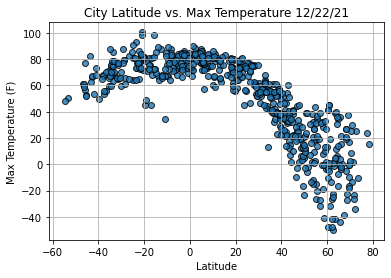

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

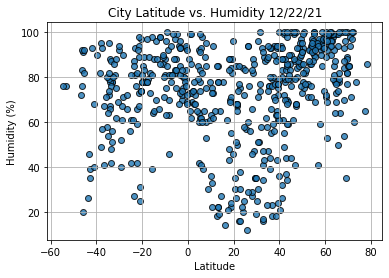

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

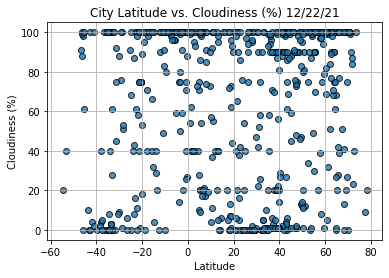

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

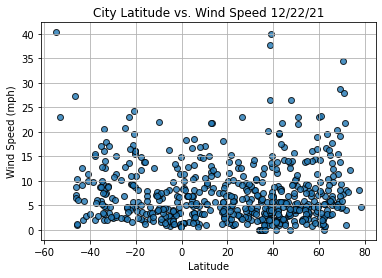

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a linear rergression function
 
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [25]:
# Create the Hemisphere DataFrames
# we have southern, but now we need northern, which from the city_data_df
# Can use loc method: row = df.loc[row_index]

# present information at index 13
index13 = city_data_df.loc[13]
index13

City                Kanniyakumari
Country                        IN
Date          2021-12-22 06:30:15
Lat                        8.0833
Lng                       77.5667
Max Temp                    82.98
Humidity                       60
Cloudiness                     91
Wind Speed                  14.92
Name: 13, dtype: object

In [26]:
# filter a dataframe based on a value of a row
# by northern hemisphere
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
567    False
568     True
569    False
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [27]:
# combine the two and get the head()
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Khatanga,RU,2021-12-22 06:33:40,71.9667,102.5000,-34.26,100,23,1.10
2,Felanitx,ES,2021-12-22 06:33:40,39.4696,3.1483,52.45,88,100,3.47
3,Sibolga,ID,2021-12-22 06:33:41,1.7427,98.7792,83.98,69,100,5.17
6,Porbandar,IN,2021-12-22 06:33:42,21.6422,69.6093,76.98,50,100,4.61
9,Key West,US,2021-12-22 06:29:41,24.5557,-81.7826,75.20,72,20,13.80


In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


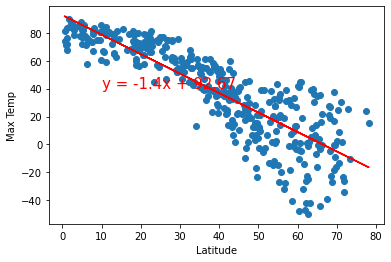

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [44]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [45]:
slope

-1.395785200400077

In [46]:
r_value

-0.856111405004766

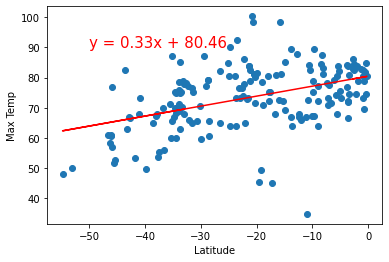

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [48]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [49]:
r_value

0.4287091369846329

In [ ]:
# READING SAYS....

# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is 
# less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. 
# This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
# And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

# My results however say...

# Fairly strong for Northern Hemisphere and weak for Southern based on the r_values. Could it be due to it being winter?



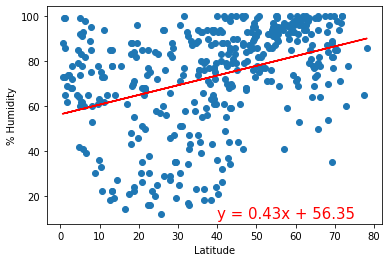

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [60]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [61]:
r_value

0.37662179172726834

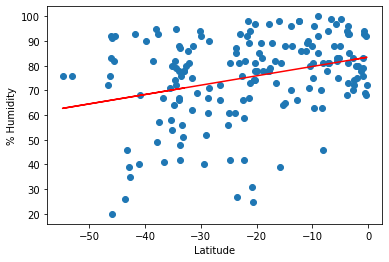

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [63]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [64]:
r_value

0.3067939110045849

In [65]:
# Both relationships low correlations


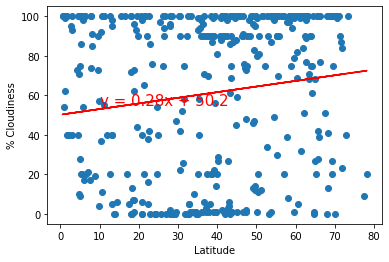

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

In [75]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [76]:
r_value

0.14356304622833144

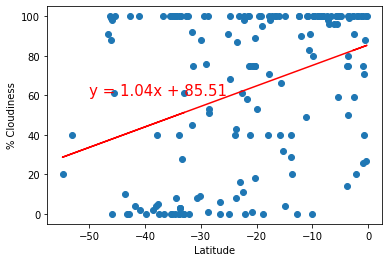

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [79]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [80]:
r_value

0.36051272086296593

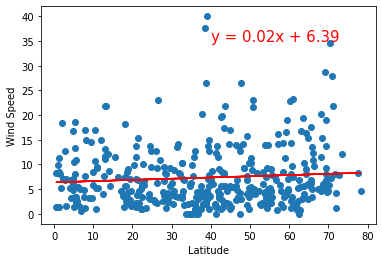

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [83]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [84]:
r_value

0.08070615544831211

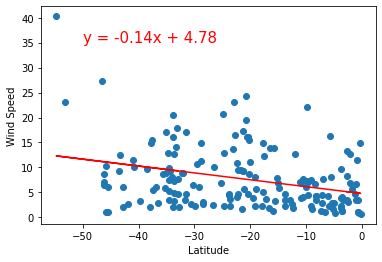

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))


In [87]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [88]:
r_value

-0.3112896048494798